In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, robust_scale

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

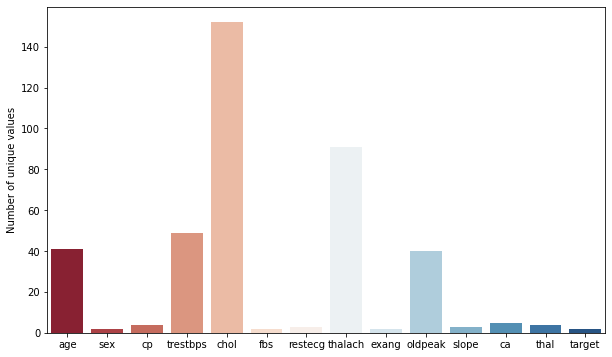

In [8]:
unique_count = pd.Series([len(df[a].unique()) for a in df.columns], df.columns)
display(unique_count)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(unique_count.index, unique_count, palette='RdBu')
plt.ylabel('Number of unique values')
plt.show()

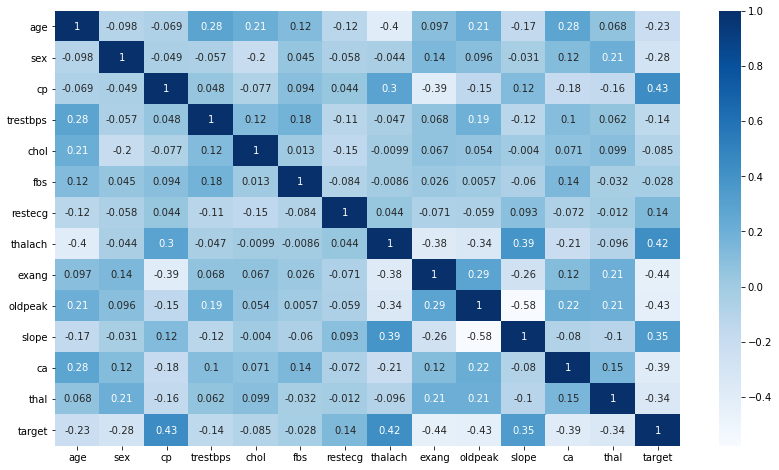

In [9]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [10]:
X = df.drop('target', axis=1)
y = df['target']
display(X.shape, y.shape)

(303, 13)

(303,)

# LogisticRegression without any preprocessing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

results = {}
results['LogisticRegression'] = accuracy_score(y_test, y_pred)

0.8681318681318682
0.8867924528301887
0.8867924528301887
0.8867924528301887


# LogisticRegression with PCA

In [12]:
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([7.47564199e-01, 1.50370221e-01, 8.45968470e-02, 1.62159604e-02,
       3.84085658e-04, 2.81234229e-04, 2.28993383e-04, 9.98328415e-05,
       7.72143117e-05, 5.87402295e-05, 5.02927817e-05, 4.09679747e-05,
       3.14113086e-05])

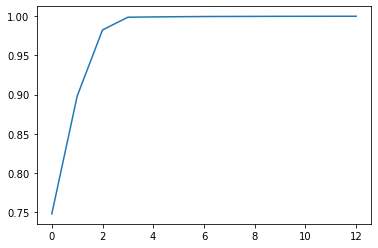

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [14]:
X_pca = PCA(n_components=4).fit_transform(X)
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3
0,-12.267345,2.873838,14.969879,6.892940
1,2.690137,-39.871374,0.877882,-10.583598
2,-42.950214,-23.636820,1.759446,-7.786655
3,-10.944756,-28.438036,-7.044180,8.328134
4,106.979053,-15.874468,-14.861575,3.223808


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

results['LogisticRegression with PCA'] = accuracy_score(y_test, y_pred)

0.7582417582417582
0.7719298245614035
0.8301886792452831
0.8


# LogisticRegression with Standardization

In [16]:
X_scaled = pd.DataFrame(robust_scale(X), columns=X.columns)
X_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.592593,0.0,1.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,-1.0,0.0,-1.0
1,-1.333333,0.0,0.5,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,-1.0,0.0,0.0
2,-1.037037,-1.0,0.0,0.00,-0.566929,0.0,-1.0,0.584615,0.0,0.3750,1.0,0.0,0.0
3,0.074074,0.0,0.0,-0.50,-0.062992,0.0,0.0,0.769231,0.0,0.0000,1.0,0.0,0.0
4,0.148148,-1.0,-0.5,-0.50,1.795276,0.0,0.0,0.307692,1.0,-0.1250,1.0,0.0,0.0


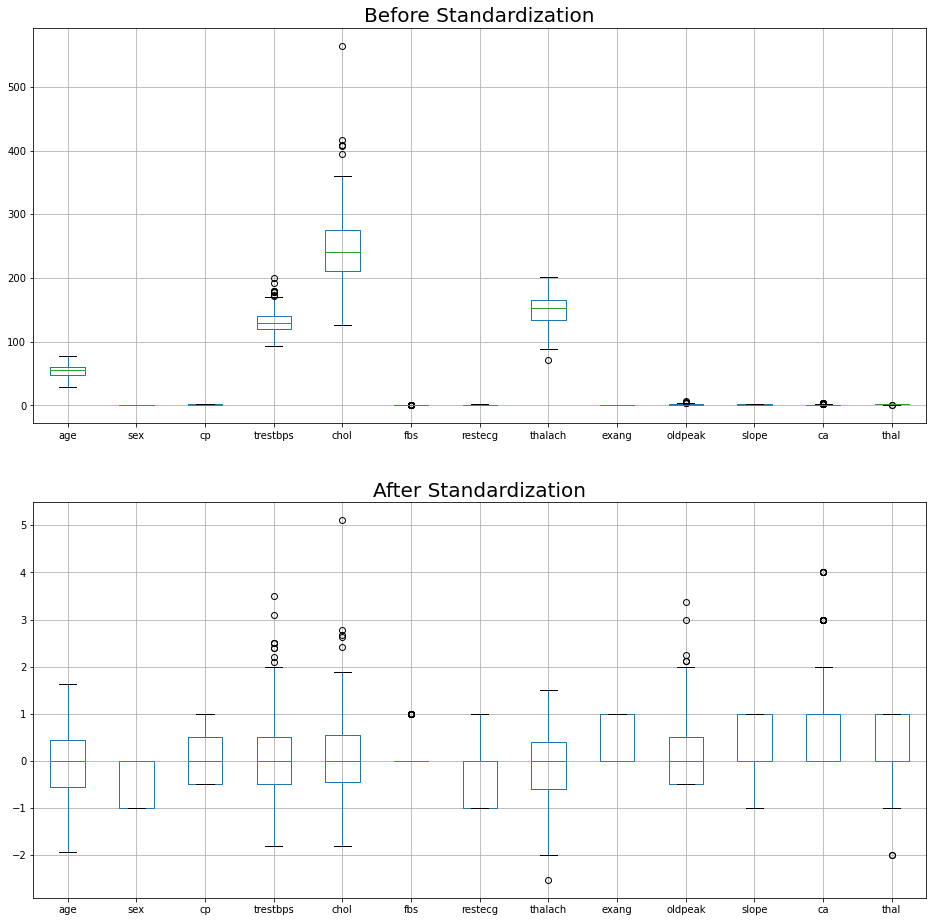

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16))
X.boxplot(ax=ax1)
ax1.set_title('Before Standardization', fontsize=20)
X_scaled.boxplot(ax=ax2)
ax2.set_title('After Standardization', fontsize=20)
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

results['LogisticRegression with Standardization'] = accuracy_score(y_test, y_pred)

0.8901098901098901
0.8727272727272727
0.9411764705882353
0.9056603773584905


In [19]:
for key, value in results.items():
    print('{}:\t{}'.format(key, value))

LogisticRegression:	0.8681318681318682
LogisticRegression with PCA:	0.7582417582417582
LogisticRegression with Standardization:	0.8901098901098901
